In [1]:
from TinkoffAPI_module.client import MyClient

client = MyClient()
for stock, info in client.get_my_stocks().items():
    print(stock)
    print(f"figi={info['figi']}")

Сбер Банк - привилегированные акции
figi=BBG0047315Y7
Роснефть
figi=BBG004731354
ЛУКОЙЛ
figi=BBG004731032
РУСАЛ
figi=BBG008F2T3T2
Доллар США
figi=BBG0013HGFT4


In [2]:
client.sell_stock(figi="BBG008F2T3T2", lots=1)

Succesfully made market order to sell stock with figi = BBG008F2T3T2


{'payload': {'commission': {'currency': 'RUB', 'value': 0.0},
             'executed_lots': 1,
             'message': None,
             'operation': 'Sell',
             'order_id': '31286233655',
             'reject_reason': None,
             'requested_lots': 1,
             'status': 'Fill'},
 'status': 'Ok',
 'tracking_id': '3be9824256ac76e6'}

In [3]:
client.buy_stock(figi="BBG008F2T3T2", lots=1)

Succesfully made market order to buy stock with figi = BBG008F2T3T2


{'payload': {'commission': {'currency': 'RUB', 'value': 0.0},
             'executed_lots': 1,
             'message': None,
             'operation': 'Buy',
             'order_id': '31286263310',
             'reject_reason': None,
             'requested_lots': 1,
             'status': 'Fill'},
 'status': 'Ok',
 'tracking_id': '19522ed451d3b843'}

In [1]:
from dataproccesing import dp 
from model import model
from datetime import datetime
import torch
from torch.optim import Adam

loss_fn = torch.nn.MSELoss(reduction="mean")
m = model.GRU(
    input_dim = 1,
    hidden_dim = 20,
    num_layers = 5,
    output_dim = 1
)
#opt_adam = Adam(m.parameters())
opt_sgd = torch.optim.SGD(m.parameters(), lr=0.1)
#lr_scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(opt_sgd, 10, eta_min=0, last_epoch=- 1, verbose=False)
lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(opt_sgd, 0.9, last_epoch=- 1, verbose=False)
start = datetime(2018, 1, 1)
train_dl, test_dl = dp.get_dataloaders("SBER.ME", start, 20, 50)
losses = model.train(m, train_dl, 100, opt_sgd, loss_fn)

c:\users\иван\appdata\local\programs\python\python38\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([19, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0 | Loss: 0.009047036059200764
Epoch: 1 | Loss: 0.006973284762352705
Epoch: 2 | Loss: 0.01200780924409628
Epoch: 3 | Loss: 0.004983792547136545
Epoch: 4 | Loss: 0.004409609828144312
Epoch: 5 | Loss: 0.003962247632443905
Epoch: 6 | Loss: 0.006446706131100655
Epoch: 7 | Loss: 0.004126196261495352
Epoch: 8 | Loss: 0.006284910254180431


KeyboardInterrupt: 

In [2]:
from dataproccesing import dp 
from datetime import datetime
start = datetime(2018, 1, 1)
train_dl, test_dl = dp.get_dataloaders("SBER.ME", start, 20, 50)

In [3]:
for x, y in train_dl:
    print(x.shape)
    break

torch.Size([1, 19, 1])


In [3]:
def test(model,
         test_dl: torch.utils.data.DataLoader):
    r"""

    Args:
        model:
        test_dl:
        metrics:
        metrics_funcs:

    Returns:
        predictions: list of predictions for testing data
        true_values: list of true labels for testing data

    Testing cycle for HailNet

    """
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    with torch.no_grad():
        model.eval()
        predictions = []
        true_values = []
        for xt, yt in test_dl:
            xt, yt = xt.to(device), yt.to(device)
            predictions.append(model(xt))
            true_values.append(yt)
    return predictions, true_values

In [3]:
#sber.me - adam, lr = 0.001
preds_lr, true_values = test(m, test_dl)

In [5]:
#sber.me - adam, lr = cosine
preds_cos, true_values = test(m, test_dl)

In [7]:
#sber.me - adam, lr = exp
preds_exp, true_values = test(m, test_dl)

In [9]:
#sber.me - sgd
preds_sgd_lr, true_values = test(m, test_dl)

In [12]:
#sber.me - sgd, cos
preds_sgd_cos, true_values = test(m, test_dl)

In [4]:
#sber.me - sgd, exp
preds_sgd_exp, true_values = test(m, test_dl)

In [9]:
for x, y in train_dl:
    print(x)
    print(y)
    break

tensor([[231.9000, 238.8000, 238.6000, 240.4000, 237.7600, 239.0000, 237.7500,
         238.8500, 239.6400, 239.8200, 245.5000, 242.4500, 243.9900, 247.5300,
         250.6400, 247.0000, 250.4800, 257.8000, 264.5000]])
tensor([[263.2000]])


c:\users\иван\appdata\local\programs\python\python38\lib\site-packages\numpy\core\shape_base.py:65: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)
c:\users\иван\appdata\local\programs\python\python38\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


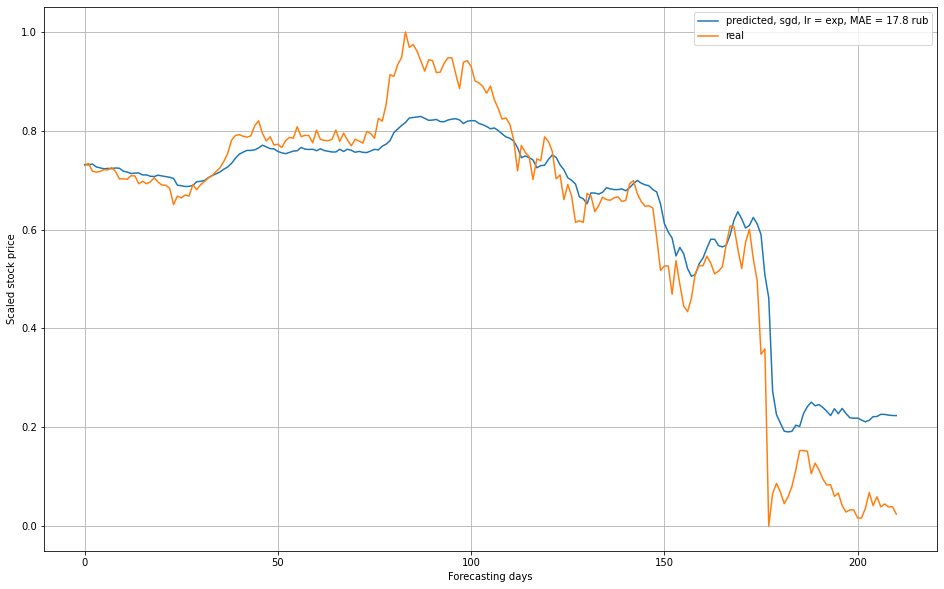

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 10))
#plt.plot([i for i in range(len(true_values))], preds_lr, label="predicted, adam, lr = 0.001, MAE = 21.7 rub")
#plt.plot([i for i in range(len(true_values))], preds_cos, label="predicted, adam, lr = cosine, MAE = 22.2 rub")
#plt.plot([i for i in range(len(true_values))], preds_exp, label="predicted, adam, lr = exp, MAE = 23.5 rub")
#plt.plot([i for i in range(len(true_values))], preds_sgd_lr, label="predicted, sgd, lr = 0.001, MAE = 71.5 rub")
#plt.plot([i for i in range(len(true_values))], preds_sgd_cos, label="predicted, sgd, lr = cosine, MAE = 19.0 rub")
plt.plot([i for i in range(len(true_values))], preds_sgd_exp, label="predicted, sgd, lr = exp, MAE = 17.8 rub")
plt.plot([i for i in range(len(true_values))], true_values, label="real")
plt.legend()
plt.ylabel("Scaled stock price")
plt.xlabel("Forecasting days")
plt.grid()
plt.show()

In [24]:
from sklearn.metrics import mean_absolute_error as mae
import numpy as np
print(mae(true_values, preds_lr) * (356 - 37))
print(mae(true_values, preds_cos)* (356 - 37))
print(mae(true_values, preds_exp) * (356 - 37))
print(mae(true_values, preds_sgd_lr) * (356 - 37))
print(mae(true_values, preds_sgd_cos) * (356 - 37))
print(mae(true_values, preds_sgd_exp) * (356 - 37))

21.7240821761366
22.258550968409576
23.503459684992148
71.52986008018891
19.017358683632306
17.781875377988786


c:\users\иван\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:746: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = np.asarray(array, order=order, dtype=dtype)
c:\users\иван\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:746: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = np.asarr